# Task Part 1

### This script contains the following points:

#### Wrangling and Data Security
#### Creating crosstabs
#### Create customer profiles

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns

In [2]:
#import data
path = '/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis'

In [3]:
final_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customers_merged.pkl'))

In [4]:
#view all the column headings to see what isn't relevant to analysis
pd.options.display.max_columns = None

In [5]:
final_merged.head()

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
#drop columns irrelevant to analysis
final_merged.drop(columns = ['product_id','add_to_cart_order','reordered','product_name','aisle_id','max_order','avg_spend','median_dspo','_merge'])

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089818,156685,106143,26,4,23,5.0,False,7,10.7,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,Regular Customer,High Spender,Frequent Customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32089819,484769,66343,1,6,11,NaN,True,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32089820,1561557,66343,2,1,11,30.0,False,12,8.1,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32089821,276317,66343,3,6,15,19.0,False,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,New Customer,Low Spender,Non-Frequent Customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
final_merged.shape

(32089823, 34)

In [8]:
#data security and addressing PII
final_merged.drop(columns = ['First Name','Last Name'])

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089818,156685,106143,26,4,23,5.0,False,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,26,Regular Customer,10.700000,High Spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32089819,484769,66343,1,6,11,NaN,True,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32089820,1561557,66343,2,1,11,30.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32089821,276317,66343,3,6,15,19.0,False,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-Range Product,Regularly Busy,Regularly Busy,Most Orders,4,New Customer,8.100000,Low Spender,30.0,Non-Frequent Customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


First and Last Name were removed as they are columns that can be used to trace back to single individuals. While scrubbing may not be advisable, this is all that's been suggested from the Achievement so far for data security. 

In [9]:
#create a regions variable
final_merged.loc[final_merged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']),'region'] = 'Northeast'


In [10]:
final_merged.loc[final_merged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'


In [11]:
final_merged.loc[final_merged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'


In [12]:
final_merged.loc[final_merged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'


In [13]:
#check the new columns to make sure it's consistent with the state column
crosstab_region = pd.crosstab(final_merged['region'], final_merged['STATE'], dropna = False)

In [14]:
crosstab_region

STATE,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0,0,0,0,0,0,0,0,0,0,0,0,0,627269,620945,618138,630269,0,0,0,0,0,626008,643603,0,633997,0,621109,0,0,0,0,0,0,632524,622358,0,0,0,0,0,628387,0,0,0,0,0,0,0,619810,0
Northeast,0,0,0,0,0,0,616165,0,0,0,0,0,0,0,0,0,0,0,0,630733,0,639850,0,0,0,0,0,0,0,612032,621441,0,629664,0,0,0,0,0,660551,650557,0,0,0,0,0,601959,0,0,0,0,0
South,630573,0,0,629424,0,0,0,630701,608265,623554,647993,0,0,0,0,0,0,627092,631113,0,622248,0,0,0,625730,0,0,0,0,0,0,0,0,646469,0,0,645192,0,0,0,631977,0,610317,635240,0,0,634241,0,606010,0,0
West,0,642660,649575,0,653455,632613,0,0,0,0,0,625223,598716,0,0,0,0,0,0,0,0,0,0,0,0,0,630980,0,631200,0,0,647637,0,0,0,0,0,630415,0,0,0,0,0,0,607125,0,0,627152,0,0,639564


In [15]:
#is there a difference in spending habits across regions?
crosstab_prices = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False)

In [16]:
crosstab_prices

spending_flag,High Spender,Low Spender
region,,
Midwest,153928,7370489
Northeast,108001,5554951
South,208364,10477775
West,159051,8057264


It's a bit hard to compare the differences in spending habits between regions here, as some regions like the South have many more states than others. Lets look at this crosstab again but as percents:

In [17]:
crosstab_prices_percent = pd.crosstab(final_merged['region'], final_merged['spending_flag'], dropna = False, normalize = 'index').round(2)

In [18]:
crosstab_prices_percent

spending_flag,High Spender,Low Spender
region,,
Midwest,0.02,0.98
Northeast,0.02,0.98
South,0.02,0.98
West,0.02,0.98


Here we can see that the proportion of high spenders to low spenders across regions is the same. We don't observe any significant difference in spending habits controlling for region.

In [19]:
#create an exclusion flag for low-activity customers
final_merged.loc[final_merged['user_order_num'] < 5, 'low_activity_customer'] = True

In [20]:
final_merged.loc[final_merged['user_order_num'] >= 5, 'low_activity_customer'] = False

In [21]:
final_merged_excluded = final_merged[final_merged['low_activity_customer'] == False]

In [22]:
final_merged_excluded.head(10)

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge,region,low_activity_customer
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
15,431534,1,5,4,15,28.0,False,12427,2,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
16,3367565,1,6,2,7,19.0,False,12427,2,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
17,550135,1,7,1,9,20.0,False,12427,3,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Busiest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
18,3108588,1,8,1,14,14.0,False,12427,1,1,Original Beef Jerky,23,19,4.4,Low-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In [23]:
final_merged_excluded.shape

(24177845, 36)

In [24]:
#export this new dataframe
final_merged_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_merged_excluded.pkl'))

In [25]:
#find medians of income for age groups above and below 40
final_merged_excluded[final_merged_excluded['Age']<40].agg({'income':['median']})

,income
median,69218.0


In [26]:
final_merged_excluded[final_merged_excluded['Age']>=40].agg({'income':['median']})

,income
median,115363.0


In [27]:
#create flag variable profiles for age, dependents, goods, and income

In [28]:
#age
final_merged_excluded.loc[final_merged_excluded['Age']<40, 'age_group'] = 'Young'
final_merged_excluded.loc[final_merged_excluded['Age']>=40, 'age_group'] = 'Old'

/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/kimballwightman/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
#depenedents
final_merged_excluded.loc[final_merged_excluded['num_dependants']>0, 'has_dependents'] = True
final_merged_excluded.loc[final_merged_excluded['num_dependants']==0, 'has_dependents'] = False

In [30]:
#goods
final_merged_excluded.loc[final_merged_excluded['department_id']==1, 'department'] = 'Frozen'
final_merged_excluded.loc[final_merged_excluded['department_id']==2, 'department'] = 'Other'
final_merged_excluded.loc[final_merged_excluded['department_id']==3, 'department'] = 'Bakery'
final_merged_excluded.loc[final_merged_excluded['department_id']==4, 'department'] = 'Produce'
final_merged_excluded.loc[final_merged_excluded['department_id']==5, 'department'] = 'Alcohol'
final_merged_excluded.loc[final_merged_excluded['department_id']==6, 'department'] = 'International'
final_merged_excluded.loc[final_merged_excluded['department_id']==7, 'department'] = 'Beverages'
final_merged_excluded.loc[final_merged_excluded['department_id']==8, 'department'] = 'Pets'
final_merged_excluded.loc[final_merged_excluded['department_id']==9, 'department'] = 'Dry Goods Pasta'
final_merged_excluded.loc[final_merged_excluded['department_id']==10, 'department'] = 'Bulk'
final_merged_excluded.loc[final_merged_excluded['department_id']==11, 'department'] = 'Personal Care'
final_merged_excluded.loc[final_merged_excluded['department_id']==12, 'department'] = 'Meat Seafood'
final_merged_excluded.loc[final_merged_excluded['department_id']==13, 'department'] = 'Pantry'
final_merged_excluded.loc[final_merged_excluded['department_id']==14, 'department'] = 'Breakfast'
final_merged_excluded.loc[final_merged_excluded['department_id']==15, 'department'] = 'Canned Goods'
final_merged_excluded.loc[final_merged_excluded['department_id']==16, 'department'] = 'Dairy Eggs'
final_merged_excluded.loc[final_merged_excluded['department_id']==17, 'department'] = 'Household'
final_merged_excluded.loc[final_merged_excluded['department_id']==18, 'department'] = 'Babies'
final_merged_excluded.loc[final_merged_excluded['department_id']==19, 'department'] = 'Snacks'
final_merged_excluded.loc[final_merged_excluded['department_id']==20, 'department'] = 'Deli'
final_merged_excluded.loc[final_merged_excluded['department_id']==21, 'department'] = 'Missing'

In [31]:
#income
final_merged_excluded.loc[(final_merged_excluded['income']>=70000) & (final_merged_excluded['age_group']=='Young'),'income_class'] = 'Upper-Class'
final_merged_excluded.loc[(final_merged_excluded['income']>=115000) & (final_merged_excluded['age_group']=='Old'),'income_class'] = 'Upper-Class'
final_merged_excluded.loc[(final_merged_excluded['income']<70000) & (final_merged_excluded['age_group']=='Young'),'income_class'] = 'Lower-Class'
final_merged_excluded.loc[(final_merged_excluded['income']<115000) & (final_merged_excluded['age_group']=='Old'),'income_class'] = 'Lower-Class'


In [32]:
#create a customer profile variables based on age, dependents, and income
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Young Upper-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Young Upper-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Young Lower-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Young') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Young Lower-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Old Upper-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Upper-Class'), 'customer_profile'] = 'Old Upper-Class (ND)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==True) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Old Lower-Class (D)'
final_merged_excluded.loc[(final_merged_excluded['age_group']=='Old') & (final_merged_excluded['has_dependents']==False) & (final_merged_excluded['income_class']=='Lower-Class'), 'customer_profile'] = 'Old Lower-Class (ND)'


In [33]:
final_merged_excluded.head()

,order_id,user_id,user_order_num,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,median_dspo,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,num_dependants,fam_status,income,_merge,region,low_activity_customer,age_group,has_dependents,department,income_class,customer_profile
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Least Busy,Least Busy Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Regularly Busy,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-Range Product,Regularly Busy,Busiest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False,Young,True,Beverages,Lower-Class,Young Lower-Class (D)


The "D" and "ND" in the names for each customer profile stand for "Dependents" and "No Dependents".

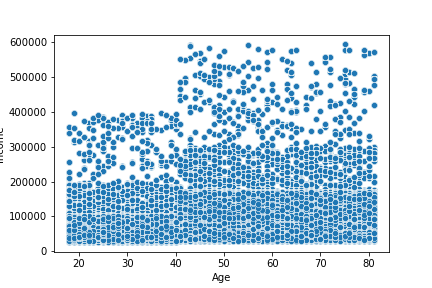

In [34]:
#this is the scatterplot from the last Exercise that demonstrates the relationship between age and income.
from IPython.display import Image
Image("/Users/kimballwightman/Documents/CareerFoundry/Instacart Basket Analysis/04 Analysis/Visualizations/scat_age_inc.png")

In [35]:
#make sure the customer_profile column executed properly
final_merged_excluded['customer_profile'].value_counts(dropna = False)

Old Upper-Class (D)       5974779
Old Lower-Class (D)       5892945
Young Lower-Class (D)     3221154
Young Upper-Class (D)     3046374
Old Upper-Class (ND)      2014777
Old Lower-Class (ND)      1958373
Young Lower-Class (ND)    1080352
Young Upper-Class (ND)     989091
Name: customer_profile, dtype: int64

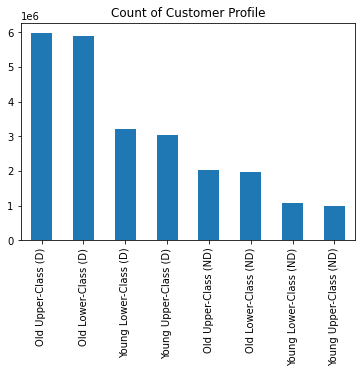

In [36]:
#create a bar chart of customer_profile
bar_1 = final_merged_excluded['customer_profile'].value_counts().plot.bar(title = 'Count of Customer Profile')

In [37]:
#aggregate max, mean, and min values on customer_profile level for usage frequency and expenditure
final_merged_excluded.groupby('customer_profile').agg({'user_order_num':['mean','min','max'],'prices':['mean','min','max']})

user_order_num             prices              
                                 mean min max       mean  min      max
customer_profile                                                      
Old Lower-Class (D)         21.741003   5  99   8.204036  1.0  99999.0
Old Lower-Class (ND)        22.061633   5  99   8.711886  1.0  99999.0
Old Upper-Class (D)         21.975700   5  99  14.985674  1.0  99999.0
Old Upper-Class (ND)        22.316219   5  99  15.215210  1.0  99999.0
Young Lower-Class (D)       21.868804   5  99   7.656747  1.0  14900.0
Young Lower-Class (ND)      21.984683   5  99   7.650149  1.0  14900.0
Young Upper-Class (D)       22.148261   5  99  16.697866  1.0  99999.0
Young Upper-Class (ND)      21.793829   5  99  16.985100  1.0  99999.0

Average price tag per group:
- Young Upper: 17.00
- Young Lower: 7.65
- Old Upper: 15.00
- Old Lower: 8.50

In [38]:
#compare your customer profiles with regions and department
crosstab_region = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['region'], dropna = False)

In [39]:
crosstab_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Old Lower-Class (D),1345958,1048127,1957313,1541547
Old Lower-Class (ND),465055,345531,640634,507153
Old Upper-Class (D),1429387,1067860,1957273,1520259
Old Upper-Class (ND),476646,344638,672795,520698
Young Lower-Class (D),762336,552879,1079274,826665
Young Lower-Class (ND),237094,194099,367035,282124
Young Upper-Class (D),698131,547121,1036984,764138
Young Upper-Class (ND),243100,169914,337355,238722


Customer profiles across each region are the same proportionally, but there are a lot more customers over the age of 40 with dependents.

In [40]:
crosstab_dept = pd.crosstab(final_merged_excluded['department'], final_merged_excluded['customer_profile'], dropna = False)

In [41]:
crosstab_dept

customer_profile,Old Lower-Class (D),Old Lower-Class (ND),Old Upper-Class (D),Old Upper-Class (ND),Young Lower-Class (D),Young Lower-Class (ND),Young Upper-Class (D),Young Upper-Class (ND)
department,,,,,,,,
Alcohol,23528,8423,26524,9991,13626,4829,15470,4602
Babies,77270,25665,86903,28742,41218,13833,43936,15450
Bakery,207875,68984,220921,74977,114223,38792,112258,36469
Beverages,524015,171526,473295,160921,279716,94095,232521,80063
Breakfast,131243,43052,123724,41985,73027,24374,63388,19536
Bulk,7487,2207,6165,2030,3779,1183,3426,1094
Canned Goods,180896,59594,203146,66936,100137,34290,102526,32881
Dairy Eggs,972589,327456,1022967,342055,536275,180156,529341,170308
Deli,186319,63743,192144,65514,103936,34876,96916,31726


Text(0, 0.5, 'Customer Profile Count by Region')

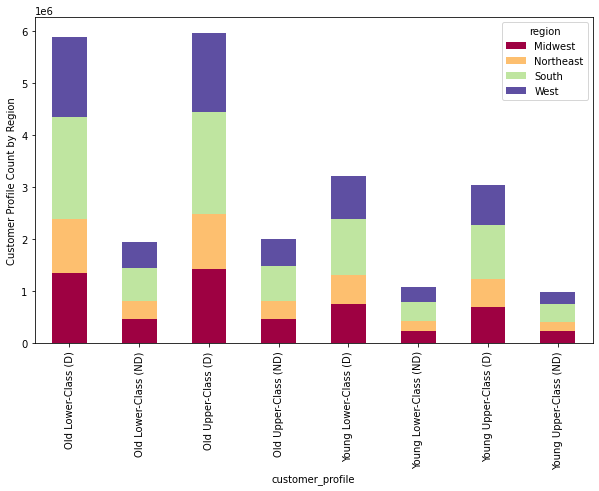

In [42]:
#create visualizations to demonstrate that behavior doesn't vary based on region or department.
bar_1 = crosstab_region.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('Customer Profile Count by Region')

In [43]:
#explore more visualizations with more crosstabs of just the flag variable profiles
crosstab_dependents = pd.crosstab(final_merged_excluded['department'], final_merged_excluded['has_dependents'], dropna = False)

Text(0, 0.5, '')

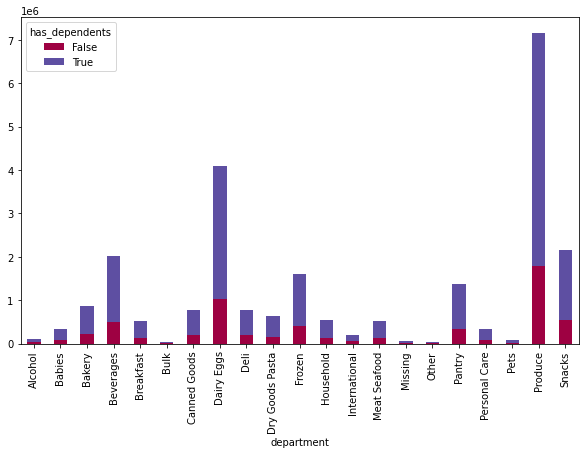

In [44]:
bar_2 = crosstab_dependents.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('')

This confirms the theory that most of our customers have dependents.

In [45]:
crosstab_3 = pd.crosstab(final_merged_excluded['customer_profile'], final_merged_excluded['fam_status'], dropna = False)


Text(0, 0.5, '')

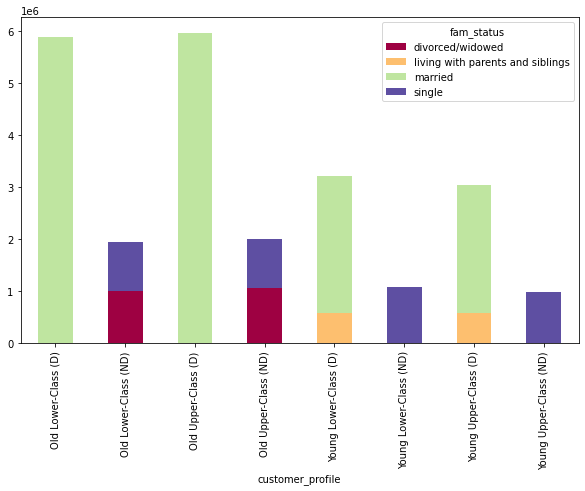

In [46]:
bar_3 = crosstab_3.plot(kind='bar', 
                    stacked=True, 
                    colormap='Spectral', 
                    figsize=(10, 6))
plt.pyplot.ylabel('')

Obviously married individuals are going to be the ones making up the group that has dependents. Divorced/widowed is only in above 40, and living with parents/siblings is only in under 40.

In [47]:
#is there a difference in how many orders are made between having dependents and not having dependents?

In [48]:
sub_1 = final_merged_excluded[final_merged_excluded['has_dependents']==True].groupby('department').agg({'user_order_num':['mean']})


In [49]:
sub_2 = final_merged_excluded[final_merged_excluded['has_dependents']==False].groupby('department').agg({'user_order_num':['mean']})


In [50]:
sub_1

,user_order_num
,mean
department,
Alcohol,20.170895
Babies,23.632599
Bakery,21.990944
Beverages,21.877500
Breakfast,21.602963
Bulk,24.726087
Canned Goods,20.946268
Dairy Eggs,22.349751


In [51]:
sub_2

,user_order_num
,mean
department,
Alcohol,22.157551
Babies,23.994910
Bakery,21.981708
Beverages,22.130257
Breakfast,21.744143
Bulk,24.747774
Canned Goods,21.411955
Dairy Eggs,22.514710


In [52]:
sub_1 = sub_1.droplevel(level=0, axis=1)

In [53]:
sub_2 = sub_2.droplevel(level=0, axis=1)

In [54]:
sub_1 = sub_1.rename(columns = {'mean':'d_mean_orders'})

In [55]:
sub_2 = sub_2.rename(columns = {'mean':'nd_mean_orders'})

In [56]:
dept_orders = pd.concat([sub_1,sub_2], axis = 1)

In [57]:
dept_orders

,d_mean_orders,nd_mean_orders
department,,
Alcohol,20.170895,22.157551
Babies,23.632599,23.994910
Bakery,21.990944,21.981708
Beverages,21.877500,22.130257
Breakfast,21.602963,21.744143
Bulk,24.726087,24.747774
Canned Goods,20.946268,21.411955
Dairy Eggs,22.349751,22.514710
Deli,21.244125,21.369567


Text(0, 0.5, '')

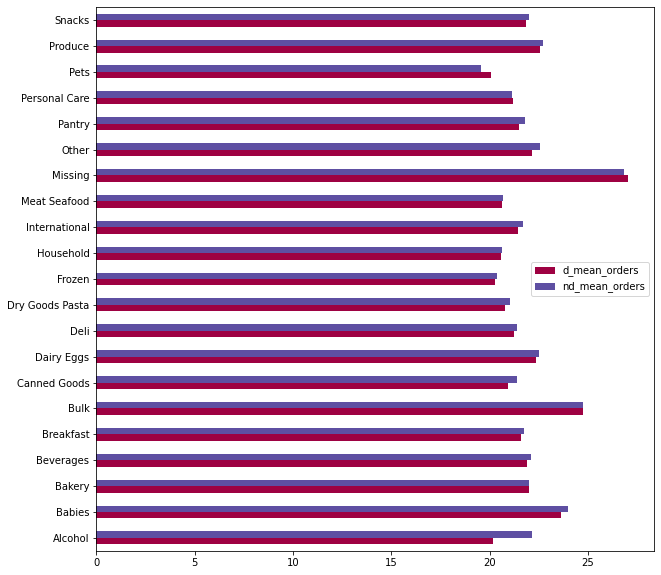

In [58]:
bar_5 = dept_orders.plot(kind='barh', 
                    colormap='Spectral', 
                    figsize=(10, 10))
plt.pyplot.ylabel('')

In [59]:
#export visualizations
bar_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_region.png'))

In [60]:
bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_profile_dept.png'))

In [61]:
bar_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_fam_status.png'))

In [62]:
bar_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_dept_orders.png'))